# Graded Assignment 4
## SQL and Exploratory Data Analysis

The following learn-by-building exercise will guide you through the process of building out a simple analysis along with some accompanying charts. This module is considerably more difficult than similar exercise blocks in the past, but it sure is a lot more rewarding!

In [6]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data_input/chinook.db")

![](assets/chinookschema2.png)

Let's try by first constructing a DataFrame using the `read_sql_query()` method that we've grown familiar to. We want to develop a simple sales visualization report of our top 5 key markets (`Country` column in `customers`) ranked by Sales (`Total` column in `invoices`). 

We also want to identify our top 5 customers by name (`FirstName`, `LastName`) in the report.

Last but not least, we want the report to include a day-of-week analysis on sales performance, and for that we will need the `InvoiceDate` column. 

> **Hint 1**: `pandas` has built-in methods of extracting the name of day in a week. We've seen this in Part 2 of this specialization (**Working with Datetime chapter**). An example usage is:
>
> `data['InvoiceDOW'] = data['InvoiceDate'].dt.day_name()`
>
>  **Hint 2**: In `read_sql_query`, you can use the `parse_dates='InvoiceDate'` argument to have the specified column parsed as date, saving you from a `to_datetime()` conversion

In [7]:
## Your code here

Top_5 = pd.read_sql_query('''
                            SELECT customers.Firstname, customers.LastName,customers.CustomerId,customers.Country, invoices.InvoiceDate,invoices.Total
                            FROM invoices
                            LEFT JOIN customers
                            ON invoices.CustomerID = customers.CustomerId
                            ''', conn, parse_dates='InvoiceDate').sort_values(by = 'Total', ascending = False)
Top_5['InvoiceDOW'] = Top_5['InvoiceDate'].dt.day_name()
Top_5['fullname'] = Top_5[['FirstName', 'LastName']].apply(lambda x: ' '.join(x), axis=1)
Top_5

pd.crosstab(
    index = Top_5["fullname"],
    columns = "Total_buy",
    aggfunc=("sum"),
    values=Top_5["Total"]
).sort_values("Total_buy", ascending = False).head()

col_0,Total_buy
fullname,
Helena Holý,49.62
Richard Cunningham,47.62
Luis Rojas,46.62
Hugh O'Reilly,45.62
Ladislav Kovács,45.62


1. Which of the following customers are among the top 5 customers ranked by their respective total (`Total`)?
    - [ ] Victor Stevens
    - [x] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Astrid Gruber	

In [8]:
## Your code here

pd.crosstab(
    index = Top_5["Country"],
    columns = "Total_Gross",
    aggfunc=("sum"),
    values=Top_5["Total"]
).sort_values("Total_Gross", ascending = False).head()

col_0,Total_Gross
Country,
USA,523.06
Canada,303.96
France,195.10
Brazil,190.10
Germany,156.48


2. Which of the following countries are among the top 5 grossing ranked by their respective total (`Total`)?
    - [ ] United Kingdom
    - [x] Germany
    - [ ] Portugal
    - [ ] India

In [9]:
## Your code here

top5 = Top_5.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()

top5_data = Top_5[Top_5['Country'].isin(top5)].copy()

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                         categories=dayorder,
                                         ordered=True)
top5_data

,FirstName,LastName,CustomerId,Country,InvoiceDate,Total,InvoiceDOW,fullname
298,Richard,Cunningham,26,USA,2012-08-05,23.86,Sunday,Richard Cunningham
200,Victor,Stevens,25,USA,2011-05-29,18.86,Sunday,Victor Stevens
312,Isabelle,Mercier,43,France,2012-10-06,16.86,Saturday,Isabelle Mercier
102,Frank,Ralston,24,USA,2010-03-21,15.86,Sunday,Frank Ralston
192,Fynn,Zimmermann,37,Germany,2011-04-23,14.91,Saturday,Fynn Zimmermann
...,...,...,...,...,...,...,...,...
82,Wyatt,Girard,42,France,2009-12-26,0.99,Saturday,Wyatt Girard
285,John,Gordon,23,USA,2012-06-12,0.99,Tuesday,John Gordon
348,Alexandre,Rocha,11,Brazil,2013-03-18,0.99,Monday,Alexandre Rocha
89,Kathy,Chase,21,USA,2010-01-26,0.99,Tuesday,Kathy Chase


Use the code block below as reference to create a DataFrame containing records where the customers are from one of the top 5 countries. Notice that we have additionally converted our day-of-week column into a `Categorical` column:

```
top5 = ______.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()

top5_data = ______[______['Country'].isin(top5)].copy()

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                         categories=dayorder,
                                         ordered=True)
top5_data
```

In [10]:
## Your code here

top5 = Top_5.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()

top5_data = Top_5[Top_5['Country'].isin(top5)].copy()

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                         categories=dayorder,
                                         ordered=True)
top5_data

,FirstName,LastName,CustomerId,Country,InvoiceDate,Total,InvoiceDOW,fullname
298,Richard,Cunningham,26,USA,2012-08-05,23.86,Sunday,Richard Cunningham
200,Victor,Stevens,25,USA,2011-05-29,18.86,Sunday,Victor Stevens
312,Isabelle,Mercier,43,France,2012-10-06,16.86,Saturday,Isabelle Mercier
102,Frank,Ralston,24,USA,2010-03-21,15.86,Sunday,Frank Ralston
192,Fynn,Zimmermann,37,Germany,2011-04-23,14.91,Saturday,Fynn Zimmermann
...,...,...,...,...,...,...,...,...
82,Wyatt,Girard,42,France,2009-12-26,0.99,Saturday,Wyatt Girard
285,John,Gordon,23,USA,2012-06-12,0.99,Tuesday,John Gordon
348,Alexandre,Rocha,11,Brazil,2013-03-18,0.99,Monday,Alexandre Rocha
89,Kathy,Chase,21,USA,2010-01-26,0.99,Tuesday,Kathy Chase


3. How many sales transactions (or records, or rows) were from the top 5 countries?
    - [ ] 7
    - [x] 245
    - [ ] 412
    - [ ] 1715

In [11]:
## Your code here

top5_data.pivot_table(
    values='Total',
    index='InvoiceDOW',
    columns='Country',
    aggfunc='sum',
    margins=True
)[['France', 'All']]

Country,France,All
InvoiceDOW,,
Monday,25.75,173.26
Tuesday,1.98,160.41
Wednesday,11.88,195.07
Thursday,47.52,217.89
Friday,1.98,173.31
Saturday,87.15,236.70
Sunday,18.84,212.06
All,195.10,1368.70


4. Using the `pd.pivot_table()` method, answer the next two questions: How much sales (`Total`) did we make in total (`sum`) from the France market on a Tuesday? How much sales did we make in total from all the top 5 markets combined on a Friday?
    - [ ] 160.41 / 173.31  
    - [ ] 160.41 / 326.77
    - [x] 1.98 / 173.31
    - [ ] 1.98 / 326.77

<AxesSubplot:>

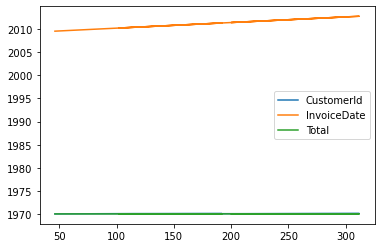

In [16]:
## Your code here
top5_data.pivot_table(
    values='Total',
    index='InvoiceDOW',
    columns='Country',
    aggfunc='sum',
    margins=True
)[['France', 'All']]

#top5_data.head(7).plot.box()
#top5_data.head(7).plot.bar()
top5_data.head(7).plot.line()

5. Give the `pivot_table` that you created a name. Remove the margins if they were included in the earlier step. Create a visualization by chaining the `.plot()` method on the pivot table. Set the `kind` parameter to be one of: `line`, `bar`, `scatter` & `box`. Which one is the **LEAST** appropriate plot type(s)?
    - [ ] `line`
    - [ ] `bar`
    - [x] `scatter`
    - [ ] `box`

In [17]:
## Your code here

genre = pd.read_sql_query(
 '''
 SELECT *
 BillingCountry AS Country, Genres.Name AS Genre 
 FROM invoices 
 LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
 LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackId 
 LEFT JOIN genres ON tracks.GenreId = genres.GenreId
 WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
 ''',conn)
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2)

DatabaseError: Execution failed on sql '
 SELECT *
 BillingCountry AS Country, Genres.Name AS Genre 
 FROM invoices 
 LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
 LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackId 
 LEFT JOIN genres ON tracks.GenreId = genres.GenreId
 WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
 ': near "BillingCountry": syntax error

6. Suppose we want to compare the best-selling music genres in the top 5 countries. Let's try by first filling in the blanks (______) in the query below:
```
genre = pd.read_sql_query(
    '''
    SELECT 
    BillingCountry AS Country, ______.Name AS Genre 
    FROM ______ 
    LEFT JOIN invoice_items ON invoices.______ = invoice_items.______
    LEFT JOIN tracks ON invoice_items.______ = ______.______ 
    LEFT JOIN ______ ON tracks.______ = genres.______
    WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
    ''',conn)
```


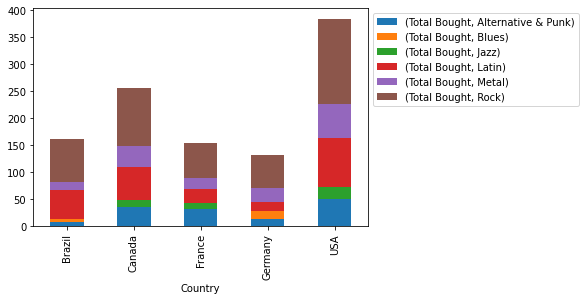

In [18]:
## Your code here

genre = pd.read_sql_query(
 '''
 SELECT 
 BillingCountry AS Country, Genres.Name AS Genre 
 FROM invoices 
 LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
 LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackId 
 LEFT JOIN genres ON tracks.GenreId = genres.GenreId
 WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
 ''',conn)
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2)

Once you've completed the query for `genre` dataframe above, copy and run the code below to create a bar chart which compares the best-selling song genres per country.
```
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 
```
What genre is **not** among the top-selling genre in Germany:
   - [ ] Blues
   - [x] Jazz
   - [ ] Alternative & Punk
   - [ ] Latin